# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/grimoire/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


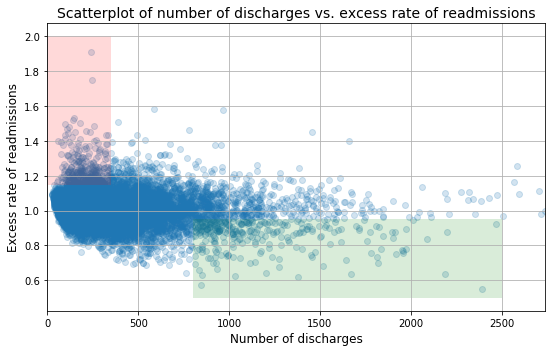

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I _agree/disagree_ because of:

" Hospitals are stratified into five peer groups, or quintiles, based on the proportion of dual-eligible stays."
https://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html

The hypothesis will be:
* $H_0$ : There isn't a statistically significant correlation between discharges (capacity) and readmissions.
* $H_A$ : There is a statistically significant correlation between discharges (capacity) and readmissions.

In [5]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [45]:
# Removing hospitals with zero discharges 0 / X = 0
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0]
df = clean_hospital_read_df.drop('Footnote', 1) # Column full of NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.1+ MB


In [57]:
df['Number of Discharges'].sort_values(ascending=False)

13666    6793
13615    3980
1892     3570
6643     2740
8126     2716
1242     2705
1698     2596
136      2581
572      2565
8818     2509
1805     2476
11545    2469
2440     2430
13730    2393
3202     2388
8249     2353
2846     2341
1448     2318
3042     2314
1352     2278
7934     2209
2758     2198
12910    2196
1605     2190
13723    2189
9444     2112
7872     2106
13326    2089
897      2060
7147     2042
         ... 
2113       39
3406       38
2952       38
5309       38
4317       38
3145       37
3207       37
1471       37
1838       37
4092       37
3087       37
2252       37
1395       36
1238       36
3312       35
5125       35
3828       35
2378       35
2670       35
2944       35
2825       34
2512       34
2441       34
2048       33
1602       31
1290       30
1853       29
1774       28
1699       27
1832       25
Name: Number of Discharges, Length: 11497, dtype: int64

In [96]:
# Less than 300 discharges
small_cap = df[df['Number of Discharges'] < 300]
print(np.mean(small_cap['Excess Readmission Ratio']))
# 300-999 discharges
mid_cap = df[(df['Number of Discharges'] >= 300) & (df['Number of Discharges'] < 1000)]
print(np.mean(mid_cap['Excess Readmission Ratio']))
# 1000-1999 discharges
large_cap = df[(df['Number of Discharges'] >= 1000) & (df['Number of Discharges'] < 2000)]
print(np.mean(large_cap['Excess Readmission Ratio']))
# 2000-3999 discharges
huge_cap1 = df[(df['Number of Discharges'] > 2000) & (df['Number of Discharges'] < 4000)]
print(np.mean(huge_cap1['Excess Readmission Ratio']))
# 2000 or greater discharges
huge_cap2 = df[df['Number of Discharges'] > 2000]
print(np.mean(huge_cap2['Excess Readmission Ratio']))
# Huge_caps were added to just play with the ranges

1.0142382121807445
1.0018998781725885
0.9774687500000006
0.9981516129032256
0.9900187499999998


In [97]:
large_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 8326 to 9359
Data columns (total 11 columns):
Hospital Name                 432 non-null object
Provider Number               432 non-null int64
State                         432 non-null object
Measure Name                  432 non-null object
Number of Discharges          432 non-null int64
Excess Readmission Ratio      432 non-null float64
Predicted Readmission Rate    432 non-null float64
Expected Readmission Rate     432 non-null float64
Number of Readmissions        432 non-null float64
Start Date                    432 non-null object
End Date                      432 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 40.5+ KB


**This section is comparing the different cap sizes of hospitals/facilities mean excess readmission ratios to determine if there is a statistical significant difference**

In [26]:
# Standard Error
stan_err = np.sqrt((np.std(small_cap['Excess Readmission Ratio'])**2) / len(small_cap['Excess Readmission Ratio']) + (np.std(mid_cap['Excess Readmission Ratio'])**2) / len(mid_cap['Excess Readmission Ratio']))
print(f'{stan_err:.10f}')

moe = 1.96 * stan_err # Margin of Error
print(f'{moe:.10f}')
numerator = np.mean(small_cap['Excess Readmission Ratio']) - np.mean(mid_cap['Excess Readmission Ratio'])
z = numerator / stan_err # Standard Error == denominator
pval = 2 * stats.norm.sf(abs(z))
print('Z score: ', f'{z:.5f}')
print('P-value: ', f'{pval:.7f}')

0.0017609157
0.0034513948
Z score:  7.00677
P-value:  0.0000000


In [61]:
# Standard Error
stan_err = np.sqrt((np.std(mid_cap['Excess Readmission Ratio'])**2) / len(mid_cap['Excess Readmission Ratio']) + (np.std(large_cap['Excess Readmission Ratio'])**2) / len(large_cap['Excess Readmission Ratio']))
print(f'{stan_err:.10f}')

moe = 1.96 * stan_err # Margin of Error
print(f'{moe:.10f}')
numerator = np.mean(mid_cap['Excess Readmission Ratio']) - np.mean(large_cap['Excess Readmission Ratio'])
z = numerator / stan_err # Standard Error == denominator
pval = 2 * stats.norm.sf(abs(z))
print('Z score: ', f'{z:.5f}')
print('P-value: ', f'{pval:.7f}')

0.0058122450
0.0113920003
Z score:  4.20339
P-value:  0.0000263


In [98]:
# Standard Error
stan_err = np.sqrt((np.std(large_cap['Excess Readmission Ratio'])**2) / len(large_cap['Excess Readmission Ratio']) + (np.std(huge_cap2['Excess Readmission Ratio'])**2) / len(huge_cap2['Excess Readmission Ratio']))
print(f'{stan_err:.10f}')

moe = 1.96 * stan_err # Margin of Error
print(f'{moe:.10f}')
numerator = np.mean(large_cap['Excess Readmission Ratio']) - np.mean(huge_cap2['Excess Readmission Ratio'])
z = numerator / stan_err # Standard Error == denominator
pval = 2 * stats.norm.sf(abs(z))
print('Z score: ', f'{z:.5f}')
print('P-value: ', f'{pval:.7f}')

0.0270233374
0.0529657413
Z score:  -0.46441
P-value:  0.6423516


**This section looks at the percentage of hospitals/facilities have excess readmission rate greater than/less than 1%. It is broken down by the caps created earlier**

In [41]:
# hospitals/facilities with number of discharges < 300 that have excess readmission rates greater and than 1, as a percent
print(small_cap[small_cap['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count() / small_cap['Excess Readmission Ratio'].count() * 100)
print(small_cap[small_cap['Excess Readmission Ratio'] <= 1]['Excess Readmission Ratio'].count() / small_cap['Excess Readmission Ratio'].count() * 100)

53.74918140144074
46.25081859855927


In [42]:
# hospitals/facilities with number of discharges between 299 and 1000 that have excess readmission rates greater and than 1, as a percent
print(mid_cap[mid_cap['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count() / mid_cap['Excess Readmission Ratio'].count() * 100)
print(mid_cap[mid_cap['Excess Readmission Ratio'] <= 1]['Excess Readmission Ratio'].count() / mid_cap['Excess Readmission Ratio'].count() * 100)

49.746192893401016
50.25380710659898


In [94]:
# hospitals/facilities with number of discharges > 1000 that have excess readmission rates greater and than 1, as a percent
print(large_cap[large_cap['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count() / large_cap['Excess Readmission Ratio'].count() * 100)
print(large_cap[large_cap['Excess Readmission Ratio'] <= 1]['Excess Readmission Ratio'].count() / large_cap['Excess Readmission Ratio'].count() * 100)

43.98148148148148
56.018518518518526


In [89]:
# hospitals/facilities with number of discharges > 1000 that have excess readmission rates greater and than 1, as a percent
print(huge_cap1[huge_cap1['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count() / huge_cap1['Excess Readmission Ratio'].count() * 100)
print(huge_cap1[huge_cap1['Excess Readmission Ratio'] <= 1]['Excess Readmission Ratio'].count() / huge_cap1['Excess Readmission Ratio'].count() * 100)

51.61290322580645
48.38709677419355


In [90]:
# hospitals/facilities with number of discharges > 1000 that have excess readmission rates greater and than 1, as a percent
print(huge_cap2[huge_cap2['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count() / huge_cap2['Excess Readmission Ratio'].count() * 100)
print(huge_cap2[huge_cap2['Excess Readmission Ratio'] <= 1]['Excess Readmission Ratio'].count() / huge_cap2['Excess Readmission Ratio'].count() * 100)

50.0
50.0


By increasing the cut of point from 100 to 300, which is in line with their recommendation cut off, the low discharge hospitals "63% have excess readmission rate greater than 1" shifts drastically downward to 53.75%. This is just under a 10% difference, and brings it within 10 points of the large hospitals/facilities at 43.98%. We also notice that the huge hospitals see an uptick in readmissions, and breach the 1% benchmark.

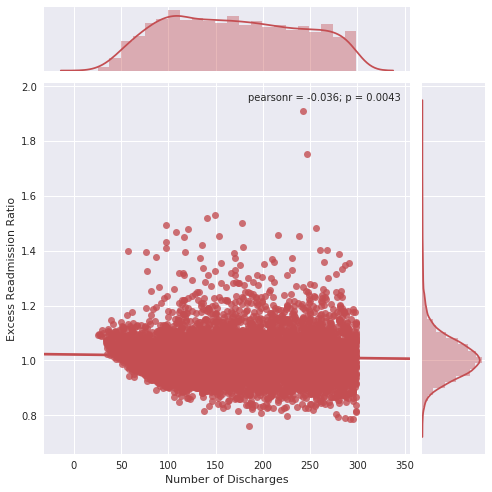

array([0.8815675, 1.2033625])

In [99]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=small_cap,
              kind='reg', color='r', size=7)
plt.show()

np.percentile(small_cap['Excess Readmission Ratio'], [2.5,97.5])

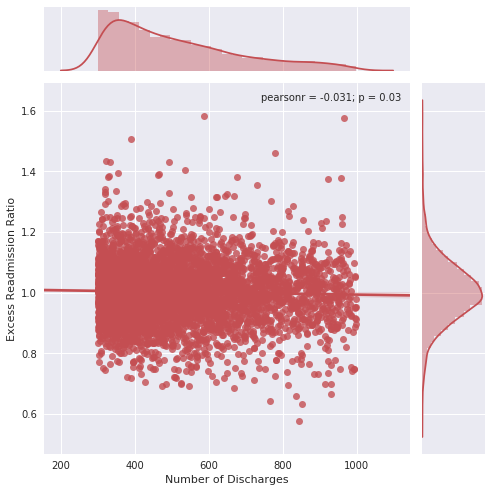

array([0.80265, 1.20517])

In [100]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=mid_cap,
              kind='reg', color='r', size=7)
plt.show()
np.percentile(mid_cap['Excess Readmission Ratio'], [2.5,97.5])

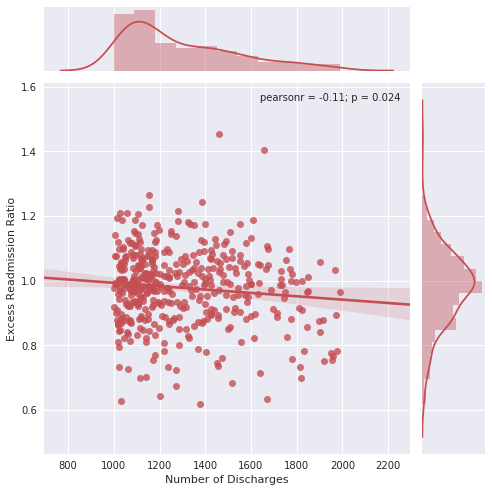

array([0.726005, 1.187535])

In [101]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=large_cap,
              kind='reg', color='r', size=7)
plt.show()
np.percentile(large_cap['Excess Readmission Ratio'], [2.5,97.5])

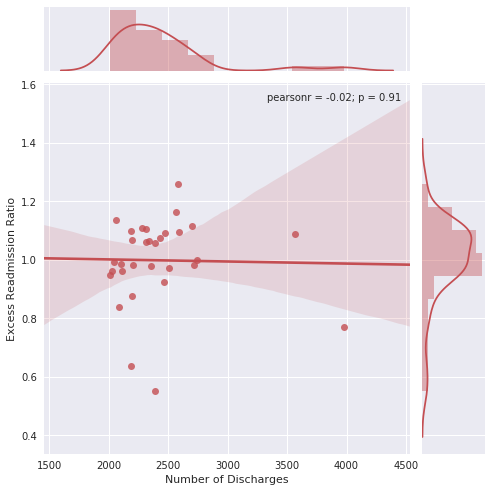

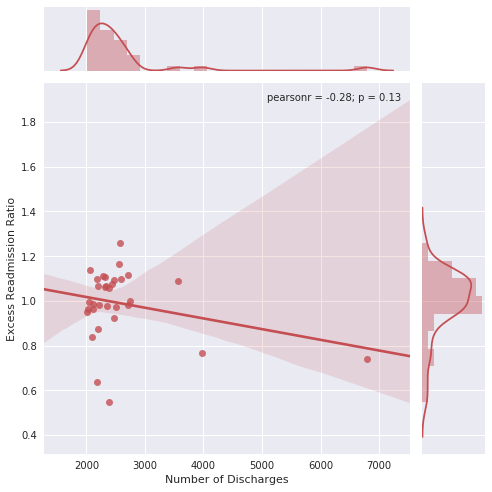

[0.613625 1.1872  ]
[0.6157625 1.18485  ]


In [104]:
# scatterplot, correlation coefficient, p-value
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=huge_cap1,
              kind='reg', color='r', size=7)
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=huge_cap2,
              kind='reg', color='r', size=7)
plt.show()
print(np.percentile(huge_cap1['Excess Readmission Ratio'], [2.5,97.5]))
print(np.percentile(huge_cap2['Excess Readmission Ratio'], [2.5,97.5]))